<a href="https://colab.research.google.com/github/Jansen-Pereira/Tarefa-2---Visualiza-o-de-Dados/blob/main/Tarefa_2_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py 

# Carregando - Gapminder World

Os dados incluídos neste conjunto de dados são do site Gapminder.org. Ele fornece dados sobre a população, expectativa de vida e PIB em diferentes países do mundo de 1952 a 2007.

Kaggle dataset: https://www.kaggle.com/datasets/tklimonova/gapminder-datacamp-2007?select=gapminder+-+gapminder.csv

Conteúdo:

1. country (país do mundo)


2. year (ano)


3. population (quantidade de pessoas que vivem no país)


4. continent (continente)


5. life_exp (tempo médio que se espera que uma pessoa viva)


6. gdp_cap (produto interno bruto dividido pela população total)








In [3]:
#Este primeiro arquivo contém os dados do ano de 2007.
data = pd.read_csv('/content/drive/MyDrive/Mestrado - Unicamp/1º Período/Metodologia Científica/gapminder.csv')

In [4]:
data.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [5]:
#dividir PIB per capita por grupo

def pib_group(df):
    df["gdp_cap_group"] = pd.cut(x=df['gdp_cap'], bins=[0,2500,8000,25000, 130000], labels=["Low", "Medium","High","Very High"])
    return df


d = pib_group(data)

In [6]:
#dividir expectativa de vida por grupo
def le_group(df):
    df["life_exp_group"] = pd.cut(x=df['life_exp'], bins=[0,50,60,70,80,100], labels=["40-50", "50-60","60-70","70-80", "+ de 80"])
    return df


df = le_group(d)

In [7]:
df.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap,gdp_cap_group,life_exp_group
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338,Low,40-50
1,23,Albania,2007,3600523,Europe,76.423,5937.029526,Medium,70-80
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465,Medium,70-80
3,47,Angola,2007,12420476,Africa,42.731,4797.231267,Medium,40-50
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640,High,70-80


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      142 non-null    int64   
 1   country         142 non-null    object  
 2   year            142 non-null    int64   
 3   population      142 non-null    int64   
 4   continent       142 non-null    object  
 5   life_exp        142 non-null    float64 
 6   gdp_cap         142 non-null    float64 
 7   gdp_cap_group   142 non-null    category
 8   life_exp_group  142 non-null    category
dtypes: category(2), float64(2), int64(3), object(2)
memory usage: 8.6+ KB


In [9]:
df.isnull().sum()

Unnamed: 0        0
country           0
year              0
population        0
continent         0
life_exp          0
gdp_cap           0
gdp_cap_group     0
life_exp_group    0
dtype: int64

# Entendento o conjunto de dados

- Histograma

In [10]:
fig = px.histogram(df, x="gdp_cap_group",
                   title='Histogram of gdp_cap_group',
                   labels={'gdp_cap_group':'gdp_cap_group'}, 
                   opacity=0.8,
                   log_y=True, 
                   color_discrete_sequence=['indianred']
                   )
fig.show()

In [11]:
fig = px.histogram(df, x="population",
                   title='Histogram of population',
                   labels={'population':'population'}, 
                   opacity=0.8,
                   log_y=True, 
                   color_discrete_sequence=['indianred'] 
                   )
fig.show()

In [12]:
fig = px.histogram(df, x="life_exp", color="continent")
fig.show()

- Gráfico de Barras

Description of Distribuition continent by gdp_cap_group:  
gdp_cap_group  Low  Medium  High  Very High
continent                                  
Africa          36      10     6          0
Americas         1      11    11          2
Asia             9      11     6          7
Europe           0       2    11         17
Oceania          0       0     0          2


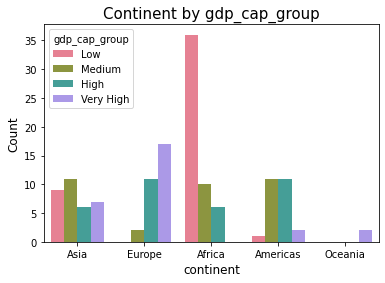

In [13]:
print("Description of Distribuition continent by gdp_cap_group:  ")
print(pd.crosstab(df["continent"],df.gdp_cap_group))

g = sns.countplot(x="continent", data=df, palette="husl",hue="gdp_cap_group")
g.set_title("Continent by gdp_cap_group", fontsize=15)
g.set_xlabel("continent", fontsize=12)
g.set_ylabel("Count", fontsize=12)


plt.show()

Description of Distribuition continent by life_exp_group:  
gdp_cap_group  Low  Medium  High  Very High
continent                                  
Africa          36      10     6          0
Americas         1      11    11          2
Asia             9      11     6          7
Europe           0       2    11         17
Oceania          0       0     0          2


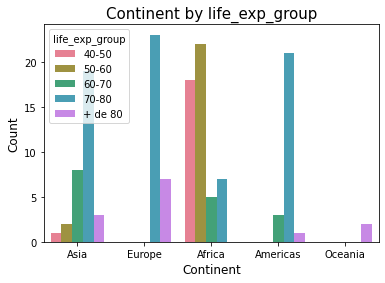

In [14]:
print("Description of Distribuition continent by life_exp_group:  ")
print(pd.crosstab(df["continent"],df.gdp_cap_group))

g = sns.countplot(x="continent", data=df, palette="husl",hue="life_exp_group")
g.set_title("Continent by life_exp_group", fontsize=15)
g.set_xlabel("Continent", fontsize=12)
g.set_ylabel("Count", fontsize=12)


plt.show()

- Gráfico de pizza

In [15]:
fig = px.pie(df, values='population', names='continent', title='World population')
fig.show()

In [16]:
df1 = df.query("continent == 'Americas'")
df1.loc[df1['population'] < 2.e6, 'country'] = 'Other countries'
fig = px.pie(df1, values='population', names='country', title='The population of America continent')
fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Gráfico de Dispersão (scatter plot)

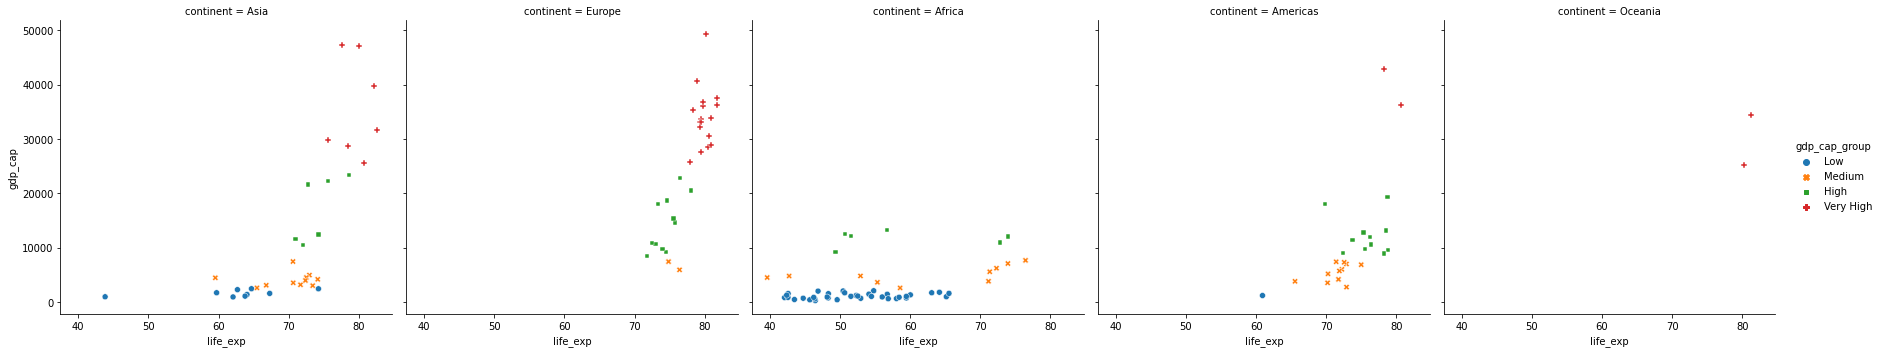

In [17]:
sns.relplot(
    data=df, y="gdp_cap", x="life_exp",
    col="continent", hue="gdp_cap_group", style="gdp_cap_group",
    kind="scatter"
)

In [18]:
#Este arquivo contém os dados de 1952 até 2007.
df   = pd.read_csv('/content/drive/MyDrive/Mestrado - Unicamp/1º Período/Metodologia Científica/gapminder_full.csv')

In [19]:
fig = px.scatter(df, x="gdp_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()